In [239]:
using Revise

In [240]:
using ClimateMARGO
using ClimateMARGO.Models
using ClimateMARGO.Diagnostics
using ClimateMARGO.Optimization
using ClimateMARGO.Plotting

In [241]:
using PyPlot

In [242]:
params = deepcopy(ClimateMARGO.IO.included_configurations["default"])


ClimateModelParameters("default", Domain(5.0, 2020.0, 2020.0, 2200.0), Economics(100.0, 0.02, 0.0022222222222222222, 0.02, 8.5, 0.034, 13.0, 0.126, 0.16, 0, 0, 0, nothing, [7.5, 8.4375, 9.375, 10.3125, 11.25, 12.1875, 13.125, 14.0625, 15.0, 15.9375  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Physics(460.0, 1.1, 4.977297891066924, 1.13, 106.0, 0.73, 0.5))

In [243]:
params.domain.initial_year = 1965
params.domain.final_year = 2365
params.domain.present_year = 1985

params.physics.c0 *= 7/9
params.physics.T0 = 0.25

params.economics.ρ = 0.03
params.economics.mitigate_cost *= 3.5
params.economics.β = 0.0133/9.
params.economics.γ = 0.01
params.economics.baseline_emissions = 3.5 .*(1 + 0.01).^(t(params.domain) .- params.domain.initial_year);

In [244]:
m_base = deepcopy(ClimateModel(params))

m_temp = deepcopy(ClimateModel(params))
optimize_controls!(m_temp, temp_goal = 1.5, max_deployment=Dict("mitigate"=>1., "remove"=>0., "adapt"=>0., "geoeng"=>0.));

m_opt = deepcopy(ClimateModel(params))
optimize_controls!(m_opt, obj_option="net_benefit", max_deployment=Dict("mitigate"=>1., "remove"=>0., "adapt"=>0., "geoeng"=>0.));

Solve_Succeeded
Solve_Succeeded


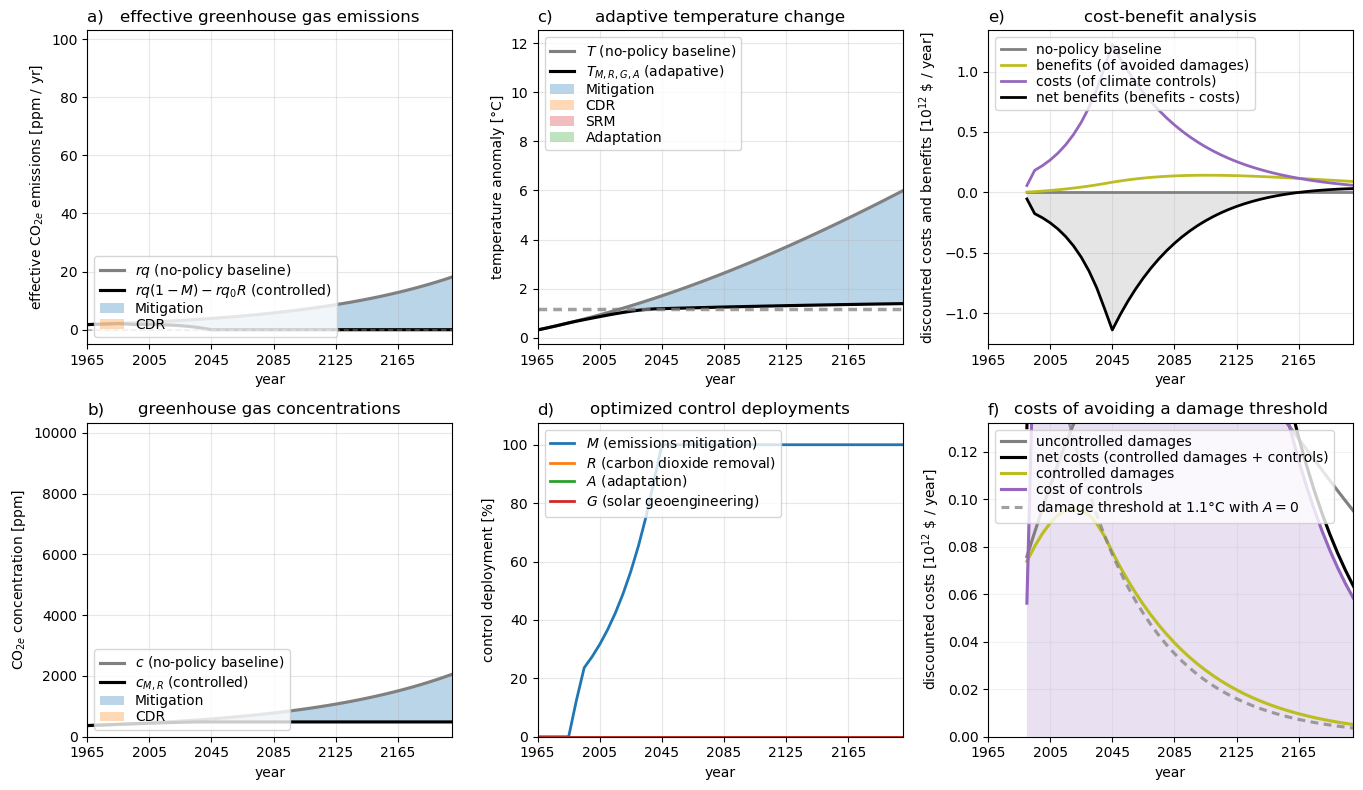

(Figure(PyObject <Figure size 1400x800 with 6 Axes>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8321ebbef0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f832ca4da90>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f83279157b8>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f832ca3fb00>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f83285d9780>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8339c587b8>])

In [245]:
plot_state(m_temp)

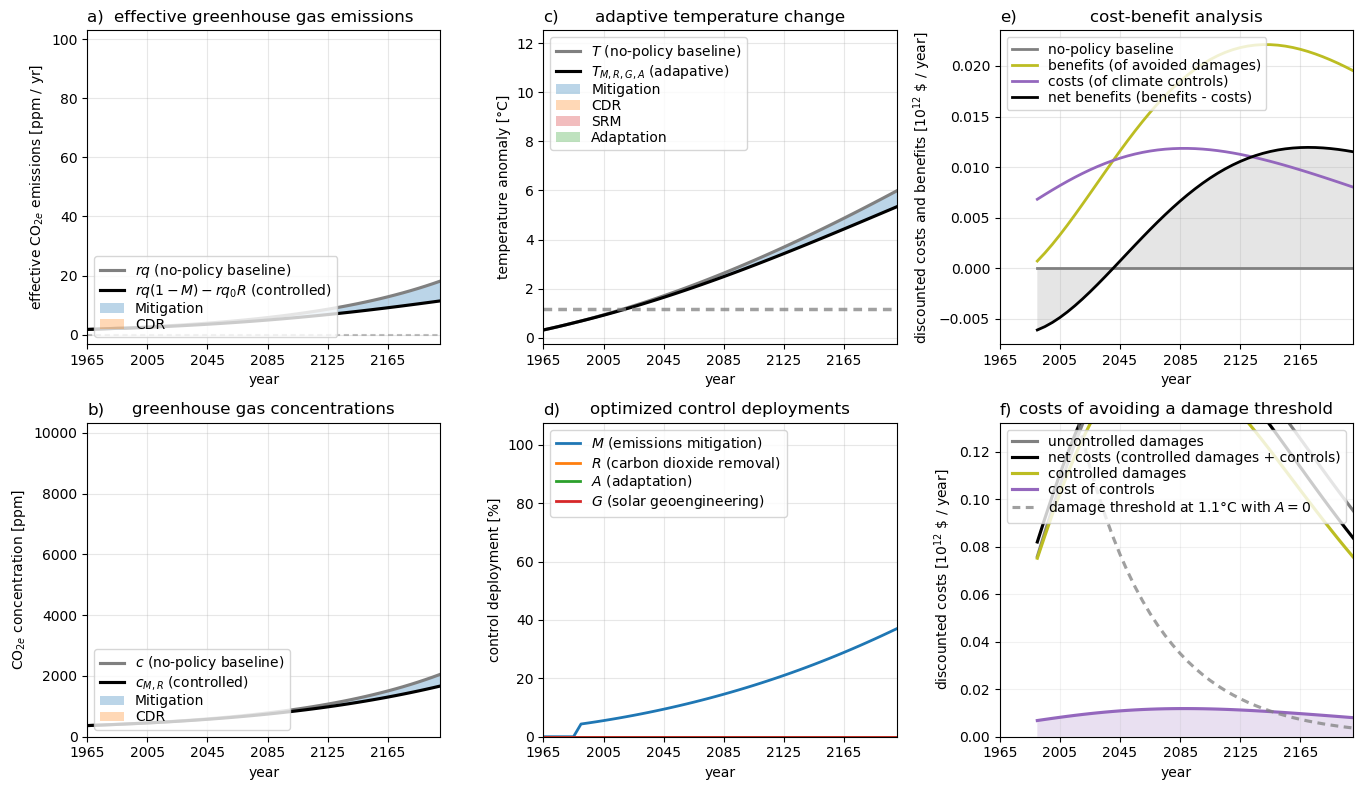

(Figure(PyObject <Figure size 1400x800 with 6 Axes>), PyCall.PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8320fd20f0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8321e1e550>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8320f9a710>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8323100b00>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f8321cd4f60>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f83231360f0>])

In [246]:
plot_state(m_opt)